<a href="https://colab.research.google.com/github/Lmagalhaesf/explorando_um_naufragio/blob/master/Script/Explorando_um_naufragio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import pandas as pd #

from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB 

from sklearn.preprocessing import LabelEncoder #

import matplotlib.pyplot as plt #

import seaborn as sns #

import graphviz 

from sklearn.tree import export_graphviz

from scipy import stats 

from sklearn.svm import SVC 

from sklearn.ensemble import ExtraTreesClassifier 

from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

In [125]:
#buscando dados
dados = pd.read_csv('titanic.csv') 

In [63]:
dados

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [64]:
display(dados.dtypes)

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [65]:
# ver a porcentagem valores faltantes
(dados.isnull().sum() / dados.shape[0]).sort_values(ascending=False)

Fare                       0.0
Parents/Children Aboard    0.0
Siblings/Spouses Aboard    0.0
Age                        0.0
Sex                        0.0
Name                       0.0
Pclass                     0.0
Survived                   0.0
dtype: float64

In [66]:
dados.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [67]:
dados['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [68]:
dados['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [69]:
stats.shapiro(dados['Fare'])

(0.5228440761566162, 1.3872854796815689e-43)

In [70]:
# Analisar a probabilidade de sobrevivência pelo Sexo
dados[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.190227


In [71]:
# Analisar a probabilidade de sobrevivência pelo numero ou filhos a bordo
dados[['Parents/Children Aboard', 'Survived']].groupby(['Parents/Children Aboard']).mean()

,Survived
Parents/Children Aboard,
0,0.345697
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [72]:
# Analisar a probabilidade de sobrevivência pela classe
dados[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.244353


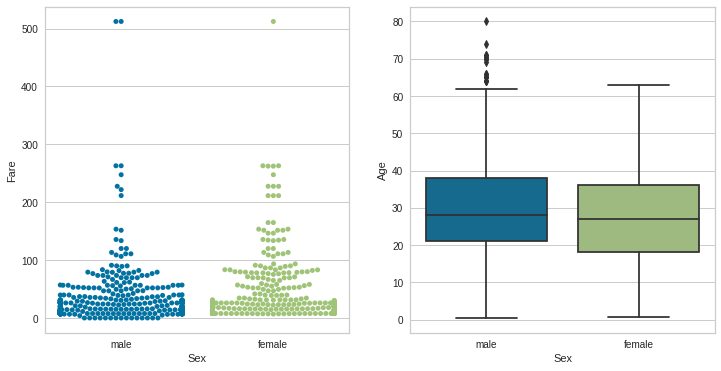

In [73]:
#gerando um gráfico dividido
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,6))

sns.swarmplot(x='Sex', y='Fare', data=dados, ax=axis1)
sns.boxplot(x='Sex', y='Age', data=dados, ax=axis2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


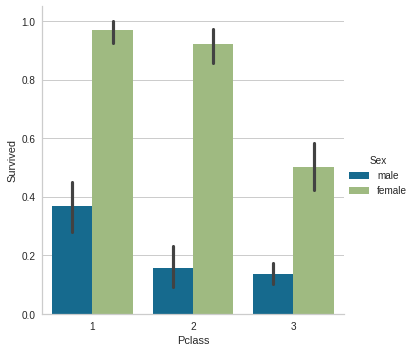

In [75]:
sns.factorplot('Pclass', 'Survived', 'Sex', data=dados, kind="bar")

In [225]:
# converter 'Sex' em 0 e 1
dados['Sex'] = dados['Sex'].map({'male': 0, 'female': 1})

In [226]:
dados.corr(method='pearson')

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,0.542152,-0.129507,1.000000,-0.091875,0.113249,0.244337,0.181137
Age,-0.059665,-0.391492,-0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.181137,0.112329,0.158839,0.215470,1.000000


In [234]:
# converter 'Survived' em morreu e viveu
dados['Survived'] = dados['Survived'].map({0: 'morreu', 1: 'viveu'})

In [145]:
dados['Sex'].value_counts()

0    573
1    314
Name: Sex, dtype: int64

In [146]:
dados['Survived'].value_counts()

morreu    545
viveu     342
Name: Survived, dtype: int64

In [147]:
dados

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,morreu,3,0,22.0,1,0
1,viveu,1,1,38.0,1,0
2,viveu,3,1,26.0,0,0
3,viveu,1,1,35.0,1,0
4,morreu,3,0,35.0,0,0
...,...,...,...,...,...,...
882,morreu,2,0,27.0,0,0
883,viveu,1,1,19.0,0,0
884,morreu,3,1,7.0,1,2
885,viveu,1,0,26.0,0,0


In [227]:
#retirando colunas indesejadas
dados.drop(['Name','Fare'], axis=1, inplace=True)

In [155]:
dados

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,morreu,3,0,22.0,1,0
1,viveu,1,1,38.0,1,0
2,viveu,3,1,26.0,0,0
3,viveu,1,1,35.0,1,0
4,morreu,3,0,35.0,0,0
...,...,...,...,...,...,...
882,morreu,2,0,27.0,0,0
883,viveu,1,1,19.0,0,0
884,morreu,3,1,7.0,1,2
885,viveu,1,0,26.0,0,0


In [256]:
#criando uma variável somente com as colunas 2 a 5, que correspondem aos valores das medições
previsores = dados.iloc[:,1:6].values

In [257]:
previsores

array([[ 3.,  0., 22.,  1.,  0.],
       [ 1.,  1., 38.,  1.,  0.],
       [ 3.,  1., 26.,  0.,  0.],
       ...,
       [ 3.,  1.,  7.,  1.,  2.],
       [ 1.,  0., 26.,  0.,  0.],
       [ 3.,  0., 32.,  0.,  0.]])

In [158]:
#visualizando os tipos de classes referentes aos dados
dados.Survived.unique()

array(['morreu', 'viveu'], dtype=object)

In [258]:
classe = dados.iloc[:,0].values

In [ ]:
classe

In [260]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3)

In [261]:
# criando modelo por Naive_bayes
naive_bayes = GaussianNB() 

In [262]:
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [263]:
previsoes = naive_bayes.predict(X_teste)

In [264]:
#criando a matriz de confusão 
confusao = confusion_matrix(y_teste, previsoes) 

In [265]:
#visualizando a matriz de confusão
confusao

array([[140,  18],
       [ 34,  75]])

In [266]:
#calculando a acurácia do modelo
taxa_acerto = accuracy_score(y_teste, previsoes)

In [267]:
taxa_erro = 1 - taxa_acerto

In [268]:
#taxa de acerto
taxa_acerto

0.8052434456928839

In [269]:
#taxa de erro
taxa_erro

0.19475655430711614

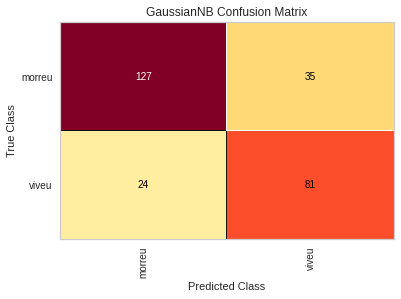

In [171]:
#gerando a mesma matriz de confusão, porém melhor detalhada
from yellowbrick.classifier import ConfusionMatrix 

v = ConfusionMatrix(GaussianNB()) 

v.fit(X_treinamento, y_treinamento) 

v.score(X_teste, y_teste) 

v.poof() 

In [178]:
#adicionando novos dados, para fazer a previsão de acordo com os dados antigos
novo_dado = pd.read_csv('titanictest.csv') 

In [179]:
novo_dado = novo_dado.iloc[:,0:5].values 

In [180]:
novo_dado

array([[ 3,  1, 37,  2,  1],
       [ 2,  0, 26,  1,  0],
       [ 1,  0, 10,  1,  2],
       [ 3,  0, 25,  1,  0],
       [ 1,  1, 30,  0,  0],
       [ 1,  0, 30,  0,  0],
       [ 1,  0, 25,  0,  0],
       [ 1,  0, 25,  0,  0],
       [ 2,  0, 35,  0,  3],
       [ 3,  1, 30,  0,  0],
       [ 1,  1, 20,  2,  2]])

In [181]:
naive_bayes.predict(novo_dado)

array(['viveu', 'morreu', 'viveu', 'morreu', 'viveu', 'viveu', 'viveu',
       'viveu', 'morreu', 'viveu', 'viveu'], dtype='<U6')

In [247]:
#fazendo classificação criando arvores de decisão

arvore = DecisionTreeClassifier() 

arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [248]:
#gerando arquivo para visualização da arvore de decisão
export_graphviz(arvore, out_file = 'tree.dot') 

In [249]:
previsoes = arvore.predict(X_teste)

In [250]:
confusao = confusion_matrix(y_teste, previsoes) 

In [251]:
confusao

array([[135,  26],
       [ 37,  69]])

In [252]:
taxa_acerto = accuracy_score(y_teste, previsoes)

In [253]:
taxa_erro = 1 - taxa_acerto

In [254]:
taxa_acerto

0.7640449438202247

In [255]:
taxa_erro

0.2359550561797753

In [193]:
#classificando por svm
svm=SVC()

In [194]:
svm.fit(X_treinamento, y_treinamento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [195]:
previsoes = svm.predict(X_teste)

In [196]:
#calculando a acurácia do modelo
taxa_acerto = accuracy_score(y_teste, previsoes) 

In [197]:
taxa_erro = 1 - taxa_acerto

In [198]:
taxa_acerto

0.6404494382022472

In [199]:
taxa_erro

0.3595505617977528

In [202]:
#utilizando diversas arvores para criar um modelo
forest = ExtraTreesClassifier() 

In [203]:
forest.fit(X_treinamento, y_treinamento)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [204]:
#gerando a importancia de cada coluna para a acurácia do modelo
importancias = forest.feature_importances_ 

In [205]:
importancias

array([0.13310805, 0.33666825, 0.40072285, 0.07345848, 0.05604237])

In [206]:
#gerando a variavel de treino com a seleção de atributos mais importantes
X_treinamento2 = X_treinamento[:,[0,1,2]] 

In [207]:
#gerando a variavel de teste com a seleção de atributos mais importantes
X_teste2 = X_teste[:,[0,1,2]] 

In [208]:
#gerando o modelo svm
svm2 = SVC() 

In [209]:
#gerando o modelo svm
svm2.fit(X_treinamento2, y_treinamento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
#gerando as previsões do modelo
previsoes2 = svm2.predict(X_teste2) 

In [211]:
#calculando a acurácia do modelo
taxa_acerto = accuracy_score(y_teste, previsoes2)

In [212]:
taxa_acerto

0.6329588014981273

In [223]:
#gerando várias arvores de decisão e utilizar a resposta de varias dessa arvores para classificar

import pandas as pd 

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import LabelEncoder 

from sklearn.metrics import confusion_matrix, accuracy_score 

from sklearn.ensemble import RandomForestClassifier 

In [228]:
dados

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
882,0,2,0,27.0,0,0
883,1,1,1,19.0,0,0
884,0,3,1,7.0,1,2
885,1,1,0,26.0,0,0


In [229]:
previsores = dados.iloc[:,1:6].values

In [235]:
classe = dados.iloc[:,0].values

In [ ]:
classe

In [237]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3)

In [238]:
floresta = RandomForestClassifier(n_estimators = 100)

In [239]:
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [240]:
previsoes = floresta.predict(X_teste)

In [241]:
confusao = confusion_matrix(y_teste, previsoes) 

In [242]:
confusao

array([[132,  29],
       [ 37,  69]])

In [243]:
#calculando acurácia do modelo
taxa_acerto = accuracy_score(y_teste, previsoes) 

In [244]:
taxa_acerto

0.7528089887640449

In [ ]:
#mostrar todas as arvores que foram criadas
floresta.estimators_ 

In [ ]:
#No caso de querer visualizar alguma das arvores
floresta.estimators_[15] 

In [ ]:
#melhor modelo, foi o por 